## Chapter 7
# 데이터 준비하기: 다듬기, 변형, 병합
---
## 데이터 변형

In [1]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                              'corned beef', 'Bacon', 'pastrami', 'honey ham',
                              'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [3]:
data.food.map(str.upper) # apply()

0          BACON
1    PULLED PORK
2          BACON
3       PASTRAMI
4    CORNED BEEF
5          BACON
6       PASTRAMI
7      HONEY HAM
8       NOVA LOX
Name: food, dtype: object

In [4]:
data.food.map(lambda item: item[-1])

0    n
1    k
2    n
3    i
4    f
5    n
6    i
7    m
8    x
Name: food, dtype: object

In [3]:
meat_to_animal = {'bacon':'pig', 'pulled pork':'pig', 'pastrami':'cow','corned beef':'cow',
                  'honey ham':'pig','nova lox':'salmon'}
data['animal'] = data.food.map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [4]:
df = pd.DataFrame(np.random.choice(10,size=[5,5]))
df.replace(0,10) # df.replace({0:10})
#df.applymap(lambda x: 10 if x==0 else x)

,0,1,2,3,4
0,3,3,2,8,9
1,7,3,1,4,3
2,6,9,5,5,6
3,10,3,6,4,10
4,3,4,1,5,9


In [5]:
df = pd.DataFrame(np.arange(9).reshape(3,3))
df

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


In [6]:
df.index = df.index.map(lambda n: 'index_'+str(n))
df.columns = df.columns.map(lambda n: 'column_'+str(n))
df

,column_0,column_1,column_2
index_0,0,1,2
index_1,3,4,5
index_2,6,7,8


In [6]:
df = pd.DataFrame(np.arange(9).reshape(3,3))
df2 = df.rename(index=lambda x: 'index_'+str(x), columns=lambda x: 'column_'+str(x))
df2.stack()

index_0  column_0    0
         column_1    1
         column_2    2
index_1  column_0    3
         column_1    4
         column_2    5
index_2  column_0    6
         column_1    7
         column_2    8
dtype: int32

In [7]:
df2.stack().swaplevel().sort_index()

column_0  index_0    0
          index_1    3
          index_2    6
column_1  index_0    1
          index_1    4
          index_2    7
column_2  index_0    2
          index_1    5
          index_2    8
dtype: int32

In [8]:
df2.rename(index={'index_0': 'kkk'})

,column_0,column_1,column_2
kkk,0,1,2
index_1,3,4,5
index_2,6,7,8


In [8]:
scores = np.random.randint(0,11,10)
display(scores)

cats = pd.cut(scores,[-1,5,8,10], labels=['하','중','상'])
display(cats, cats.codes, cats.categories)

array([10,  2,  2,  5, 10,  4,  8,  4,  8,  0])

[상, 하, 하, 하, 상, 하, 중, 하, 중, 하]
Categories (3, object): [하 < 중 < 상]

array([2, 0, 0, 0, 2, 0, 1, 0, 1, 0], dtype=int8)

Index(['하', '중', '상'], dtype='object')

In [9]:
pd.cut(scores,[-1,5,8,10])

[(8, 10], (-1, 5], (-1, 5], (-1, 5], (8, 10], (-1, 5], (5, 8], (-1, 5], (5, 8], (-1, 5]]
Categories (3, interval[int64]): [(-1, 5] < (5, 8] < (8, 10]]

In [10]:
scores = pd.Series(np.random.randint(0,11,10))
display(scores)

cats = pd.cut(scores,[-1,5,8,10], labels=['하','중','상'])
display(cats)

df = pd.DataFrame({'score': scores, 'cat': cats})
df

0     1
1     6
2     2
3    10
4     6
5     5
6     4
7     8
8     5
9     8
dtype: int32

0    하
1    중
2    하
3    상
4    중
5    하
6    하
7    중
8    하
9    중
dtype: category
Categories (3, object): [하 < 중 < 상]

,score,cat
0,1,하
1,6,중
2,2,하
3,10,상
4,6,중
5,5,하
6,4,하
7,8,중
8,5,하
9,8,중


array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.])

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

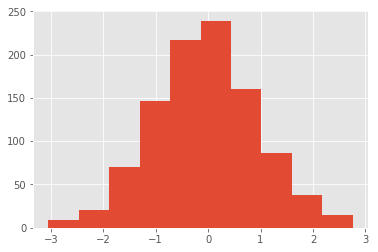

In [11]:
np.random.seed(0)
a = np.random.randn(1000)
counts,bins,_ = plt.hist(a,bins=10)
display(counts,bins)

In [12]:
cats = pd.cut(a,bins,right=False)
df = cats.value_counts()
df

[-3.046, -2.466)      9
[-2.466, -1.885)     20
[-1.885, -1.304)     70
[-1.304, -0.724)    146
[-0.724, -0.143)    217
[-0.143, 0.437)     239
[0.437, 1.018)      160
[1.018, 1.598)       86
[1.598, 2.179)       38
[2.179, 2.759)       14
dtype: int64

In [13]:
cats

[[1.598, 2.179), [-0.143, 0.437), [0.437, 1.018), [2.179, 2.759), [1.598, 2.179), ..., [-0.143, 0.437), [-0.724, -0.143), [-0.143, 0.437), [-1.304, -0.724), [-0.724, -0.143)]
Length: 1000
Categories (10, interval[float64]): [[-3.046, -2.466) < [-2.466, -1.885) < [-1.885, -1.304) < [-1.304, -0.724) ... [0.437, 1.018) < [1.018, 1.598) < [1.598, 2.179) < [2.179, 2.759)]

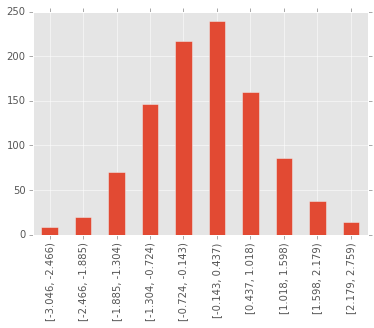

In [13]:
df.plot(kind='bar')

In [14]:
cats = pd.qcut(a,10) # qcut() 은 구간 마다 동일한 갯수의 샘플로 나누어 준다
cats.value_counts()

(-3.0469999999999997, -1.299]    100
(-1.299, -0.862]                 100
(-0.862, -0.544]                 100
(-0.544, -0.312]                 100
(-0.312, -0.058]                 100
(-0.058, 0.197]                  100
(0.197, 0.43]                    100
(0.43, 0.788]                    100
(0.788, 1.232]                   100
(1.232, 2.759]                   100
dtype: int64

In [15]:
cats = pd.qcut(a,[0,0.5,0.8,1],labels=['하','중','상'])
cats.value_counts()

하    500
중    300
상    200
dtype: int64

In [16]:
np.random.seed(111)
df = pd.DataFrame(np.random.randn(1000,4))

col = df[3]
col[col.abs()>3]

93    -3.154663
347    3.047658
755    3.002283
870    3.182795
Name: 3, dtype: float64

In [17]:
df[(df.abs()>3).any(axis=1)]

,0,1,2,3
93,-0.065624,-1.058637,-1.807695,-3.154663
124,3.265844,0.017229,-0.714969,-0.209413
347,1.521852,1.003828,1.849326,3.047658
411,-0.046363,-3.453897,-0.532499,-0.053137
413,3.137704,-1.082743,1.218864,2.043111
423,-3.126611,0.934158,-0.215173,1.350910
606,-3.045645,0.488074,0.324333,-1.332610
755,-1.249402,0.989142,-0.480479,3.002283
870,0.929035,-0.660724,-1.331115,3.182795


In [18]:
"""
df2 = df.where(df.abs()<3,sign(df)*3)
df2[(df2.abs()>=3).any(axis=1)]
"""

df2=df.copy()
df2[df2.abs()>3] = sign(df)*3
df2[(df2.abs()>=3).any(axis=1)]

,0,1,2,3
93,-0.065624,-1.058637,-1.807695,-3.000000
124,3.000000,0.017229,-0.714969,-0.209413
347,1.521852,1.003828,1.849326,3.000000
411,-0.046363,-3.000000,-0.532499,-0.053137
413,3.000000,-1.082743,1.218864,2.043111
423,-3.000000,0.934158,-0.215173,1.350910
606,-3.000000,0.488074,0.324333,-1.332610
755,-1.249402,0.989142,-0.480479,3.000000
870,0.929035,-0.660724,-1.331115,3.000000


In [19]:
df2.iloc[np.random.permutation(100)[:5]]

,0,1,2,3
14,-0.055009,1.120021,-0.191643,-0.610138
79,0.330781,-0.185133,0.084151,0.232579
25,0.103719,-0.033509,0.676452,-1.052249
2,-0.735523,-1.183940,0.238894,-0.589920
24,-1.050397,-0.127114,-1.584131,-0.611074


In [14]:
data = pd.DataFrame({'col_1': list('bbacab'), 'col_2': range(6), 'col_3': np.random.randn(6)})
data

,col_1,col_2,col_3
0,b,0,0.555963
1,b,1,0.892474
2,a,2,-0.422315
3,c,3,0.104714
4,a,4,0.228053
5,b,5,0.201480


In [21]:
data2 = data.copy()
data2['target'] = data2.col_1.map({'a':0, 'b':1, 'c':2})
# data2.drop('col_1',axis=1) # del data2['col_1']
data2

,col_1,col_2,col_3,target
0,b,0,-0.000832,1
1,b,1,-1.438003,1
2,a,2,-0.833698,0
3,c,3,-1.462460,2
4,a,4,0.180469,0
5,b,5,0.613255,1


In [22]:
pd.get_dummies(data.col_1)

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [23]:
pd.get_dummies(data,columns=['col_1'],prefix={'col_1': 'label'})

,col_2,col_3,label_a,label_b,label_c
0,0,-0.000832,0,1,0
1,1,-1.438003,0,1,0
2,2,-0.833698,1,0,0
3,3,-1.462460,0,0,1
4,4,0.180469,1,0,0
5,5,0.613255,0,1,0


In [24]:
data = pd.read_csv('movies.dat',sep='::',names=['movie_id','title','genres'])
data.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
l = []
for s in data.genres:
    l += s.split('|')
    
genres = sorted(list(set(l)))
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [26]:
data2 = data.copy()
for g in genres:
    data2['g_'+g] = data2.genres.map(lambda s: 1 if g in s.split('|') else 0)
data2.head()

,movie_id,title,genres,g_Action,g_Adventure,g_Animation,g_Children's,g_Comedy,g_Crime,g_Documentary,...,g_Fantasy,g_Film-Noir,g_Horror,g_Musical,g_Mystery,g_Romance,g_Sci-Fi,g_Thriller,g_War,g_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
